# Plots for the chapter on unknown locations

In [7]:
from plots import *
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 5, 2.5
from matplotlib.ticker import FormatStrFormatter, MultipleLocator

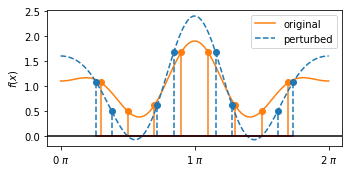

In [11]:
signal = SignalExp([-0.3, 0.5, -0.1, 1])
change = 0.5*np.array([0, 1, 0, 0])
new_signal = SignalExp(signal.parameters + change)
alpha = np.linspace(0, 5)
t = np.linspace(0, 2*np.pi, 100)
sample_pos = np.multiply([0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7], np.pi)

fig, ax = plt.subplots(1)
ax.plot(t/np.pi, signal.get_samples(t), "C1", label="original")
sample_val = signal.get_samples(sample_pos)
ax.stem(sample_pos/np.pi, sample_val,  linefmt="C1", markerfmt="C1o")

new_pos = []
new_vals = []
for s in sample_pos:
    p = signal.path(s, change, n=10)
    new_pos.append(np.copy(p[len(p)-1]))
    
new_pos = np.array(new_pos)

ax.plot(t/np.pi, new_signal.get_samples(t), "--C0", label="perturbed")
ax.stem(new_pos/np.pi, new_signal.get_samples(new_pos), linefmt="--C0")
ax.axhline(0, c='k')
plt.ylabel(r"$f(x)$")
plt.legend()
ax.xaxis.set_major_formatter(FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(MultipleLocator(base=1.0))
plt.tight_layout()
fig.savefig('shifting.pdf')
plt.show()